In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from ipywidgets import interact
sns.set()

In [2]:
holder_df = pd.read_csv("Massachusetts_MEA_Database.csv")
df = holder_df.copy()
df.head()

,Unnamed: 0,Date,Year,Enforcement Action,Entity Name,Entity Type,Conduct,Location,URL - to be filled in,*Raw Text*
0,0,8/29/2021,2003,Temporary Cease and Desist,Mortgage One Financial Corp,Mortgage Broker,Acting as a mortgage broker without a license;...,Norwood MA,https://www.mass.gov/temporary-order-to-cease-...,NaN
1,1,10/31/2021,2003,Temporary Cease and Desist,Platinum Capital Group,"Mortgage Lender,Mortgage Broker",No license; violated a memoradum of understanding,"HQ Irvine CA, branch located in Concord CA",https://www.mass.gov/temporary-order-to-cease-...,NaN
2,2,10/31/2021,2003,Temporary Cease and Desist,"KN Management, Inc.",Mortgage Broker,No license,Concord MA,https://www.mass.gov/temporary-order-to-cease-...,NaN
3,3,12/23/2021,2003,Temporary Cease and Desist,INSTAFI.COM,"Mortgage Lender,Mortgage Broker",Conducting business in an unsafe or unsound ma...,Irvine CA,https://www.mass.gov/temporary-order-to-cease-...,NaN
4,4,12/30/2021,2003,Consent Order,"NovaStar Home Mortgage, Inc.","Mortgage Lender,Mortgage Broker",Conducting business with an unlicensed mortgag...,Kansas City MO,https://www.mass.gov/consent-order/novastar-ho...,NaN


# Exploration of Data
## Cleaning Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             367 non-null    int64 
 1   Date                   367 non-null    object
 2   Year                   367 non-null    int64 
 3   Enforcement Action     367 non-null    object
 4   Entity Name            367 non-null    object
 5   Entity Type            367 non-null    object
 6   Conduct                329 non-null    object
 7   Location               328 non-null    object
 8   URL - to be filled in  325 non-null    object
 9   *Raw Text*             1 non-null      object
dtypes: int64(2), object(8)
memory usage: 28.8+ KB


In [4]:
# Finding column headings
df.columns.values.tolist()

['Unnamed: 0',
 'Date',
 'Year',
 'Enforcement Action',
 'Entity Name',
 'Entity Type',
 'Conduct',
 'Location',
 'URL - to be filled in',
 '*Raw Text*']

In [5]:
# Changing Dates of Dataframe
df["Date"] = pd.to_datetime(df["Date"])
# Removing URLs and Raw Text rows
df = df.drop(['URL - to be filled in','*Raw Text*'], axis=1)
# Replace ???s with NaN
df['Location'] = df['Location'].replace("???", np.nan)
df['Conduct'] = df['Conduct'].replace("???", np.nan)
df["Month"] = df["Date"].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          367 non-null    int64         
 1   Date                367 non-null    datetime64[ns]
 2   Year                367 non-null    int64         
 3   Enforcement Action  367 non-null    object        
 4   Entity Name         367 non-null    object        
 5   Entity Type         367 non-null    object        
 6   Conduct             287 non-null    object        
 7   Location            272 non-null    object        
 8   Month               367 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 25.9+ KB


In [6]:
# Get States
def get_States(location):
    if not pd.isnull(location):
        return location.split(" ")[-1]
    else:
        return location

df["States"] = df["Location"].apply(get_States)

In [7]:
# Clean up States
df["States"].value_counts()
df["States"]=df["States"].replace("California","CA")
df["States"]=df["States"].replace("Maryland,","MD")
df["States"]=df["States"].replace("Georgia","GA")
df["States"]=df["States"].replace("Maryland","MD")
df["States"]=df["States"].replace("Massachusetts","MA")
df["States"]=df["States"].replace("MA)","MA")
df["States"]=df["States"].replace("Ma","MA")

In [8]:
# Helper Function to split next section
def data_split(data_point):
    return data_point.split(",")
# Helper Function to return labels for single-value bar charts
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [9]:
df_entitytype = df.copy()
df_enforcement = df.copy()
df_combined = df.copy()

In [10]:
# Get Dataset split by Entity Types
df_entitytype["Entity Type"] = df_entitytype["Entity Type"].apply(data_split)
df_entitytype = df_entitytype.explode("Entity Type")
df_entitytype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 366
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          481 non-null    int64         
 1   Date                481 non-null    datetime64[ns]
 2   Year                481 non-null    int64         
 3   Enforcement Action  481 non-null    object        
 4   Entity Name         481 non-null    object        
 5   Entity Type         481 non-null    object        
 6   Conduct             385 non-null    object        
 7   Location            376 non-null    object        
 8   Month               481 non-null    int64         
 9   States              376 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 41.3+ KB


In [11]:
# Get Dataset split by Enforcement Action
df_enforcement["Enforcement Action"] = df_enforcement["Enforcement Action"].apply(data_split)
df_enforcement = df_enforcement.explode("Enforcement Action")
df_enforcement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 366
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          385 non-null    int64         
 1   Date                385 non-null    datetime64[ns]
 2   Year                385 non-null    int64         
 3   Enforcement Action  385 non-null    object        
 4   Entity Name         385 non-null    object        
 5   Entity Type         385 non-null    object        
 6   Conduct             295 non-null    object        
 7   Location            278 non-null    object        
 8   Month               385 non-null    int64         
 9   States              278 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 33.1+ KB


In [12]:
# Split by both
df_combined["Entity Type"] = df_combined["Entity Type"].apply(data_split)
df_combined["Enforcement Action"] = df_combined["Enforcement Action"].apply(data_split)
df_combined = df_combined.explode("Enforcement Action")
df_combined = df_combined.explode("Entity Type")
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 366
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          500 non-null    int64         
 1   Date                500 non-null    datetime64[ns]
 2   Year                500 non-null    int64         
 3   Enforcement Action  500 non-null    object        
 4   Entity Name         500 non-null    object        
 5   Entity Type         500 non-null    object        
 6   Conduct             393 non-null    object        
 7   Location            383 non-null    object        
 8   Month               500 non-null    int64         
 9   States              383 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 43.0+ KB


## Summary Data about Massachusetts Mortgage Enforcement Action from 2003-2010

In [13]:
# Count unique entities who had MEAs against them in MA
case_count = df["Entity Name"].nunique()
print(f"There were {case_count} total unique entities that had MEAs taken out against them from 2003 to 2010.")

There were 342 total unique entities that had MEAs taken out against them from 2003 to 2010.


In [34]:
enforcement_action_list = df_enforcement["Enforcement Action"].unique().tolist()
entity_type_list = df_entitytype["Entity Type"].unique().tolist()
year_list = df_year["Year"].unique().tolist()

In [27]:
df_year = df.groupby(["Year"]).size().reset_index(name='Count')
df_year
df_month = df.groupby(["Month"]).size().reset_index(name='Count')
# df_month = df_month.sort_values(by="Count",ascending=False).reset_index(drop=True)
df_month
df_state = df.groupby(["States"]).size().reset_index(name="Count")
df_state = df_state.sort_values(by="Count",ascending=False).reset_index(drop=True)
df_ea = df_enforcement.groupby(["Enforcement Action"]).size().reset_index(name="Count")
df_ea = df_ea.sort_values(by="Count",ascending = False).reset_index(drop=True)
df_entity = df_entitytype.groupby(["Entity Type"]).size().reset_index(name="Count")
df_entity = df_entity.sort_values(by="Count",ascending = False).reset_index(drop=True)

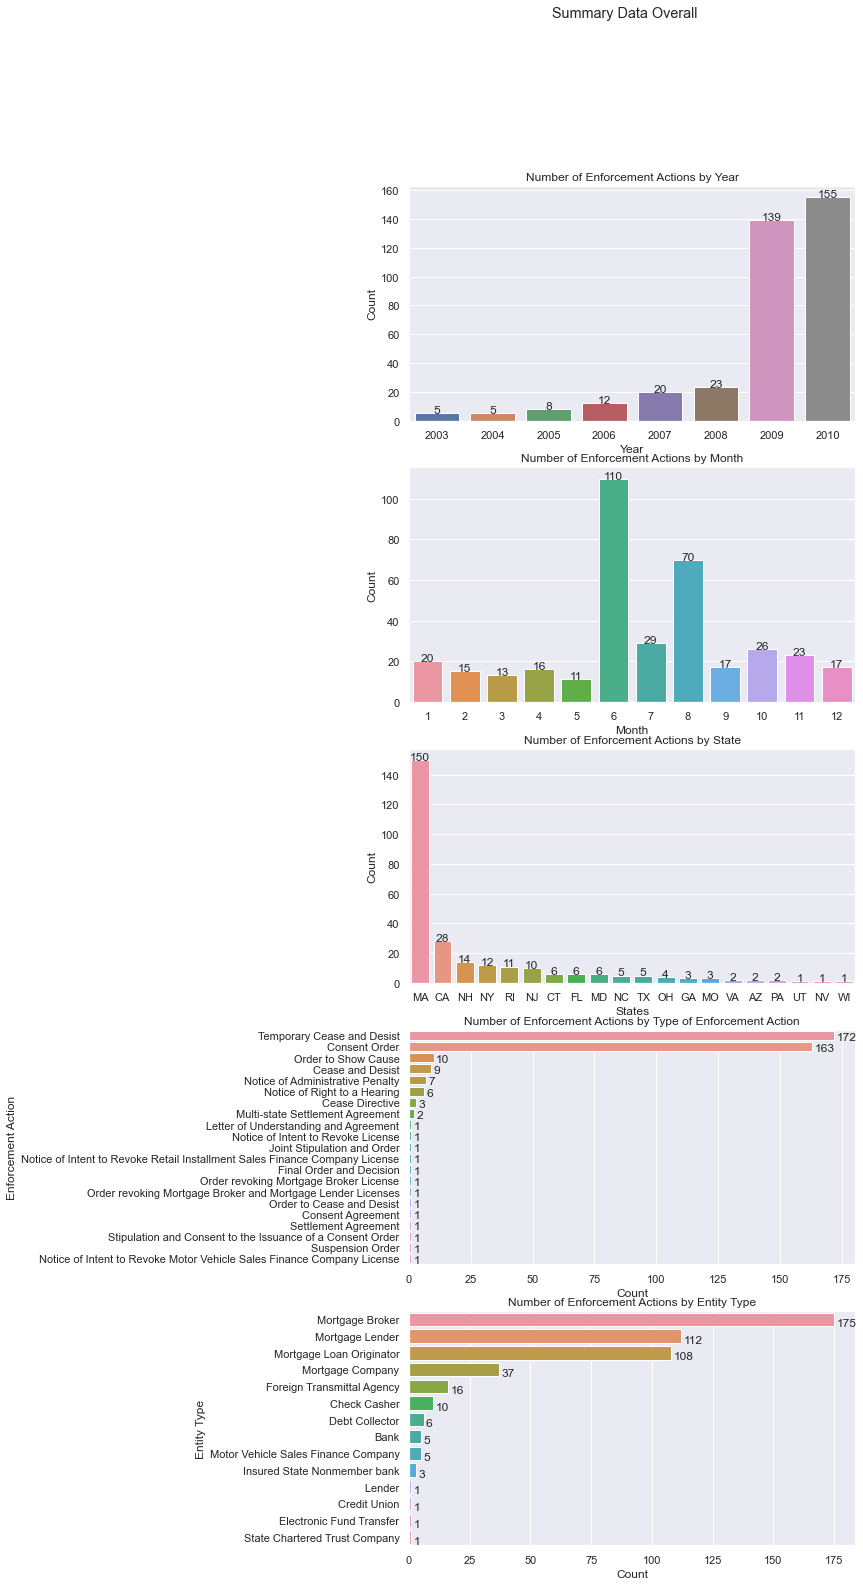

In [28]:
fig, axes = plt.subplots(5, 1, figsize=(8,25))
fig.suptitle('Summary Data Overall')

# Year
axes[0].set_title("Number of Enforcement Actions by Year")
ax1 = sns.barplot(ax=axes[0],data=df_year, x = "Year", y= "Count")
show_values_on_bars(ax1, "v", 0.3)

# Month
axes[1].set_title("Number of Enforcement Actions by Month")
ax2 = sns.barplot(ax=axes[1],data=df_month, x = "Month", y= "Count",order=df_month["Month"])
show_values_on_bars(ax2, "v", 0.3)

# States
axes[2].set_title("Number of Enforcement Actions by State")
ax3 = sns.barplot(ax=axes[2],data=df_state, y = "Count", x= "States",order=df_state["States"])
show_values_on_bars(ax3, "v", 1)

# Enforcement Action
axes[3].set_title("Number of Enforcement Actions by Type of Enforcement Action")
ax4 = sns.barplot(ax=axes[3],data=df_ea, y = "Enforcement Action", x= "Count",order=df_ea["Enforcement Action"])
show_values_on_bars(ax4, "h", 1)

# Entity Type
axes[4].set_title("Number of Enforcement Actions by Entity Type")
ax5 = sns.barplot(ax=axes[4],data=df_entity, y = "Entity Type", x= "Count",order=df_entity["Entity Type"])
show_values_on_bars(ax5, "h", 1)

In [31]:
# Breakdown of States by Year
df_state_year = pd.crosstab(df["States"],df["Year"])
df_state_year_total = df_state_year.copy()
df_state_year_total["Total"]= df_state_year.sum(axis=1)
df_state_year_total

Year,2003,2004,2005,2006,2007,2008,2009,2010,Total
States,,,,,,,,,
AZ,0,0,0,0,1,0,1,0,2
CA,2,0,0,1,2,3,16,4,28
CT,0,0,2,0,1,0,3,0,6
FL,0,0,0,0,2,0,4,0,6
GA,0,0,0,0,1,0,0,2,3
MA,2,5,5,8,5,14,64,47,150
MD,0,0,0,0,0,2,2,2,6
MO,1,0,0,0,0,0,1,1,3
NC,0,0,0,0,0,0,0,5,5


Text(0.5, 1.0, 'Breakdown of States by Years')

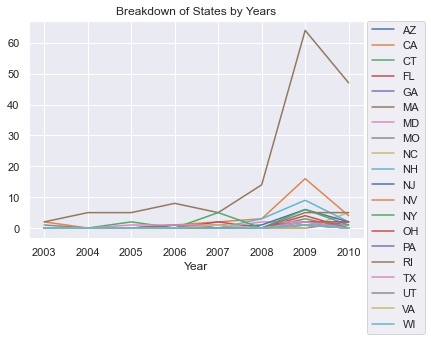

In [33]:
df_state_year.T.plot(kind='line')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Breakdown of States by Years")

In [19]:
# Breakdown of Enforcement Category by Year
df_enforcement_year = pd.crosstab(df_enforcement["Enforcement Action"],df_enforcement["Year"])
df_enforcement_year_total = df_enforcement_year.copy()
df_enforcement_year_total["Total"]= df_enforcement_year.sum(axis=1)
df_enforcement_year_total

Year,2003,2004,2005,2006,2007,2008,2009,2010,Total
Enforcement Action,,,,,,,,,
Cease Directive,0,0,0,0,0,0,1,2,3
Cease and Desist,0,1,0,1,0,2,4,1,9
Consent Agreement,0,0,0,0,0,1,0,0,1
Consent Order,1,1,6,6,4,6,18,121,163
Final Order and Decision,0,0,0,0,0,0,0,1,1
Joint Stipulation and Order,0,0,0,0,0,0,0,1,1
Letter of Understanding and Agreement,0,0,0,0,0,0,0,1,1
Multi-state Settlement Agreement,0,0,0,0,0,0,1,1,2
Notice of Administrative Penalty,0,0,0,0,0,0,0,7,7


Text(0.5, 1.0, 'Breakdown of Enforcement Action Type by Years')

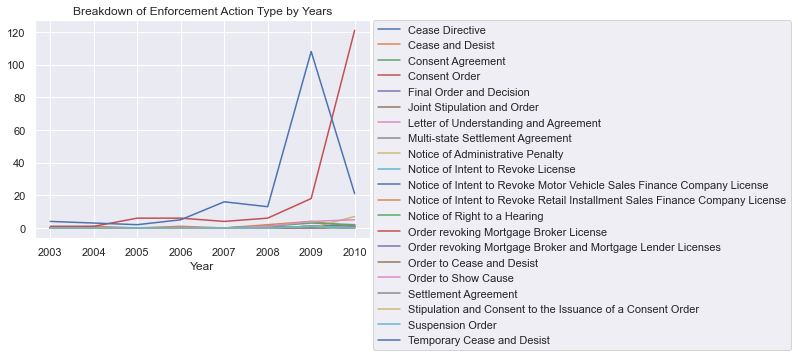

In [20]:
df_enforcement_year.T.plot(kind='line')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Breakdown of Enforcement Action Type by Years")

In [21]:
@interact(cat=enforcement_action_list)
def plot(cat):
    df_ea_year_list = df_enforcement.loc[df_enforcement["Enforcement Action"]==cat].groupby(["Year"]).size().reset_index(name="Count")
    ax = sns.barplot(data=df_ea_year_list,x="Year",y="Count")
    show_values_on_bars(ax, "v", 1)
    plt.title(f"Number of {cat}s by Years")

interactive(children=(Dropdown(description='cat', options=('Temporary Cease and Desist', 'Consent Order', 'Cea…

In [43]:
@interact(cat=year_list)
def plot(cat):
    df_year_ea_list = df_enforcement.loc[df_enforcement["Year"]==cat].groupby(["Enforcement Action"]).size().reset_index(name="Count")
    df_year_ea_list = df_year_ea_list.sort_values(by="Count",ascending=False).reset_index(drop=True)
    ax = sns.barplot(data=df_year_ea_list,y="Enforcement Action",x="Count")
    show_values_on_bars(ax, "h", 0.1)
    plt.title(f"Breakdown of Enforcement Action Types for {cat}")

interactive(children=(Dropdown(description='cat', options=(2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010), va…

In [23]:
# Breakdown of Entity Type by Year
df_entity_year = pd.crosstab(df_entitytype["Entity Type"],df_entitytype["Year"])
df_entity_year_total = df_entity_year.copy()
df_entity_year_total["Total"]= df_entity_year.sum(axis=1)
df_entity_year_total

Year,2003,2004,2005,2006,2007,2008,2009,2010,Total
Entity Type,,,,,,,,,
Lender,0,0,0,0,0,0,0,1,1
Bank,0,0,0,0,0,0,3,2,5
Check Casher,0,0,0,0,0,1,8,1,10
Credit Union,0,0,0,0,0,0,0,1,1
Debt Collector,0,0,1,1,0,0,2,2,6
Electronic Fund Transfer,0,0,0,0,0,0,1,0,1
Foreign Transmittal Agency,0,0,1,2,0,2,4,7,16
Insured State Nonmember bank,0,1,0,0,0,1,0,1,3
Mortgage Broker,5,4,6,9,12,15,100,24,175


Text(0.5, 1.0, 'Breakdown of Entity Types by Years')

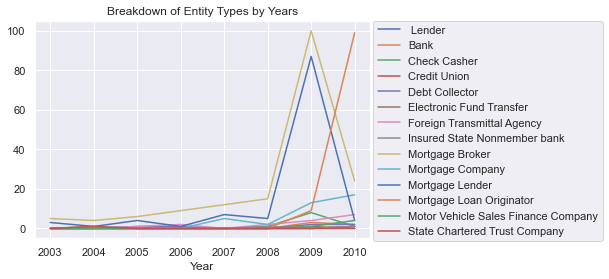

In [24]:
df_entity_year.T.plot(kind='line')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Breakdown of Entity Types by Years")

In [25]:
@interact(cat=entity_type_list)
def plot(cat):
    df_entity_year_list = df_entitytype.loc[df_entitytype["Entity Type"]==cat].groupby(["Year"]).size().reset_index(name="Count")
    ax = sns.barplot(data=df_entity_year_list,x="Year",y="Count")
    show_values_on_bars(ax, "v", 1)
    plt.title(f"Number of {cat}s by Years")

interactive(children=(Dropdown(description='cat', options=('Mortgage Broker', 'Mortgage Lender', 'Insured Stat…

In [47]:
@interact(cat=year_list )
def plot(cat):
    df_year_entity_list = df_entitytype.loc[df_entitytype["Year"]==cat].groupby(["Entity Type"]).size().reset_index(name="Count")
    df_year_entity_list = df_year_entity_list.sort_values(by="Count",ascending=False).reset_index(drop=True)
    ax = sns.barplot(data=df_year_entity_list,y="Entity Type",x="Count")
    show_values_on_bars(ax, "h", 0.1)
    plt.title(f"Breakdown of Enforcement Action Types for {cat}")

interactive(children=(Dropdown(description='cat', options=(2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010), va…

In [49]:
@interact(cat=entity_type_list)
def plot(cat):
    df_combined_copy = df_combined
    df_combined_list = df_combined_copy.loc[df_combined_copy["Entity Type"] ==cat]
    ax_combined = sns.countplot(data=df_combined_list, y="Enforcement Action",order=df_combined_list["Enforcement Action"].value_counts().index)
    show_values_on_bars(ax_combined, "h", 0.1)
    plt.title(f"Breakdown of Enforcement Action Types for {cat}")

interactive(children=(Dropdown(description='cat', options=('Mortgage Broker', 'Mortgage Lender', 'Insured Stat…